### Kepler Problem (effective one-body)
This worksheet solves the Kepler problem for a single object.  Units are chosen such that the total mass is 1.0 (m2) and the code time unit is the period of a circular orbit of radius $r = 1.0$.  In this unit system $G = 4\pi^2$.

In [2]:
using DifferentialEquations
using Plots
using LSODA
using Base

┌ Info: Precompiling LSODA [7f56f5a3-f504-529b-bc02-0b1fe5e64312]
└ @ Base loading.jl:1260


In [3]:
function deqs!(du, u, p, t)
    x1  = u[1]
    y1  = u[2]
    p1x = u[3]
    p1y = u[4]
    m1  = p[1]
    m2  = p[2]
    G   = p[3]
    gamma = G*m1*m2
    r32 = ((x1)^2 + (y1)^2)^1.5
    du[1] = p1x/m1
    du[2] = p1y/m1
    du[3] = -gamma*(x1)/r32
    du[4] = -gamma*(y1)/r32
end

deqs! (generic function with 1 method)

In [4]:
G = 4.0*pi^2
m1 = 1.0e-6
m2 = 1.0
r = 1.0

1.0

In [5]:
c0 = [m1, m2, G]
q0 = [r,0.0]
pt = 0.1*m1*sqrt(G*m2/r)
p0 = [0.0, pt]
u0 = collect(Base.Iterators.flatten([q0, p0]))

4-element Array{Float64,1}:
 1.0
 0.0
 0.0
 6.283185307179586e-7

In [6]:
tspan=(0.0, 25.0)

(0.0, 25.0)

In [7]:
prob = ODEProblem(deqs!, u0, tspan, c0)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 25.0)
u0: [1.0, 0.0, 0.0, 6.283185307179586e-7]

In [8]:
#sol = solve(prob, lsoda(), reltol=1.0e-12, abstol=1.0e-12,saveat=0.1);
#sol = solve(prob, RK4(),reltol=1.0e-8, abstol=1.0e-8,saveat=0.1);
#sol = solve(prob, RK4(),adaptive=false,dt=0.00001,saveat=0.05);
sol = solve(prob, Euler(),adaptive=false,saveat=0.01,dt=0.0001);
#sol = solve(prob, Vern9(), reltol=1.0e-12, abstol=1.0e-12, saveat=0.1,);
#sol = solve(prob, ABM54(), reltol=1.0e-12, abstol=1.0e-12, dt=1.0e-6, saveat=0.05);

In [9]:
ss1 = sol[1,:]
ss2 = sol[2,:]
ss3 = sol[3,:]
ss4 = sol[4,:];

In [17]:
scatter(ss1,ss2,aspect_ratio=:equal);
savefig("orbits.png")
#plot!(xlims=(-30,30))

In [11]:
e = similar(ss1)
@. e = (ss3^2 + ss4^2)/(2.0*m1) - G*m1*m2/sqrt(ss1^2 + ss2^2);

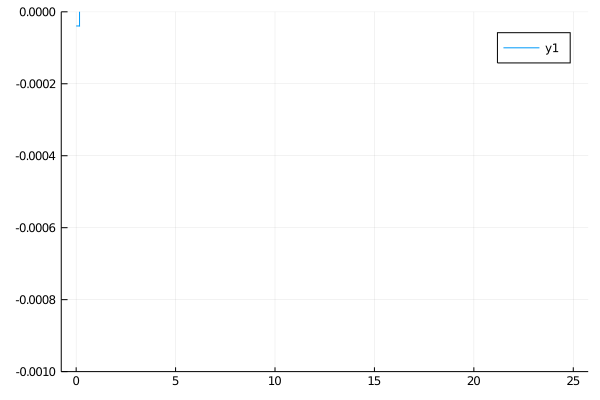

In [15]:
plot(sol.t, e)
plot!(ylims=(-0.001,0.0))

In [13]:
e

2501-element Array{Float64,1}:
 -3.9281025516335646e-5
 -3.928023843930647e-5
 -3.927945125303308e-5
 -3.927866422143757e-5
 -3.9277878588319776e-5
 -3.927709737716456e-5
 -3.927632668569028e-5
 -3.9275577913233686e-5
 -3.9274871782169536e-5
 -3.92742459551512e-5
 -3.9273770277002984e-5
 -3.927357938404584e-5
 -3.9273948640090216e-5
  ⋮
  0.003052495902017989
  0.003052495902017957
  0.003052495902017923
  0.0030524959020178898
  0.003052495902017857
  0.00305249590201782
  0.0030524959020177835
  0.0030524959020177514
  0.0030524959020177185
  0.003052495902017686
  0.0030524959020176525
  0.0030524959020176187